In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Task1_0618. auto-mpg 데이터 셋에서 mpg와 weight의 선형 관계를 그래프로 작성하세요.(전체, origin에 따른 관계 2개 작성)

In [2]:
from google.colab import files
filename=files.upload()

Saving auto-mpg.xlsx to auto-mpg.xlsx


In [3]:
auto=pd.read_excel('auto-mpg.xlsx')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


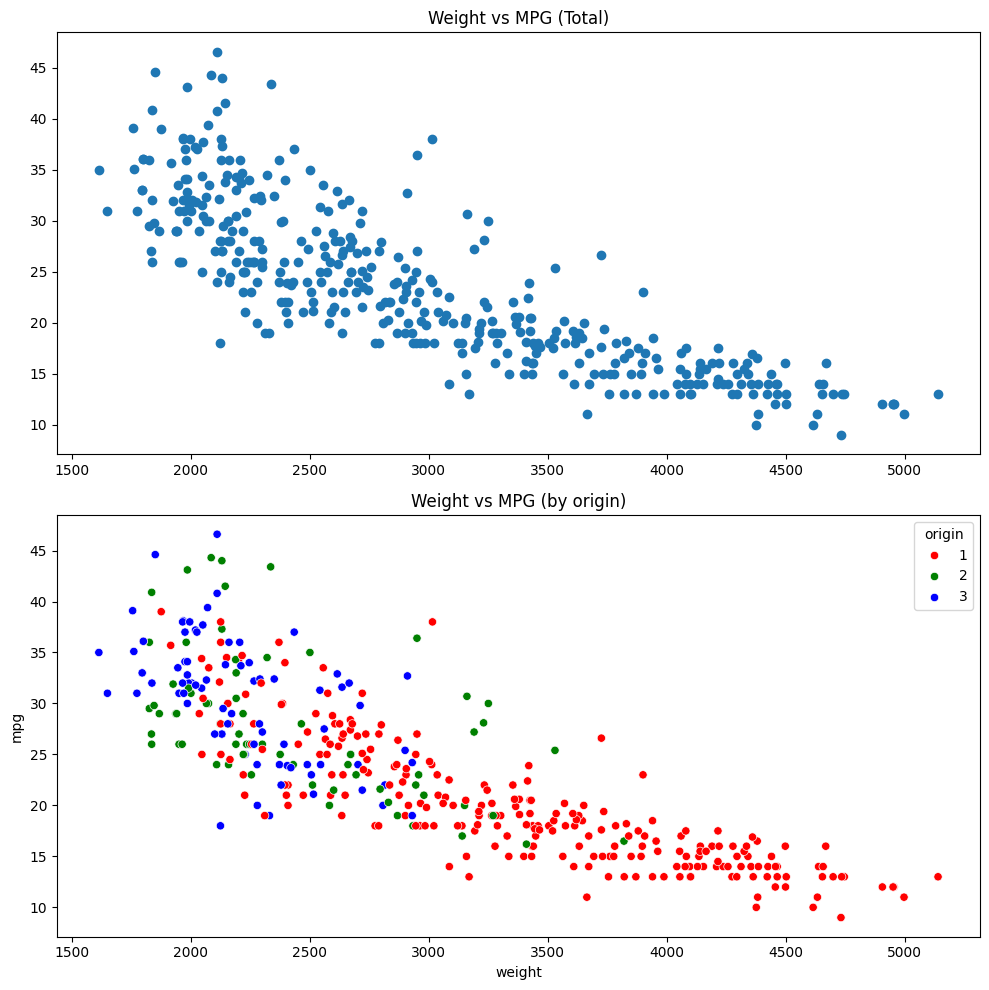

In [ ]:
fig, axes=plt.subplots(2,1,figsize=(10,10))

# 전체
axes[0].scatter(x=auto.weight,y=auto.mpg)
axes[0].set_title('Weight vs MPG (Total)')

# origin에 따른 관계
sns.scatterplot(data=auto, x='weight', y='mpg', hue='origin', palette=['red','green','blue'], ax=axes[1])
axes[1].set_title('Weight vs MPG (by origin)')

plt.tight_layout()
plt.show()

<Figure size 400x300 with 0 Axes>

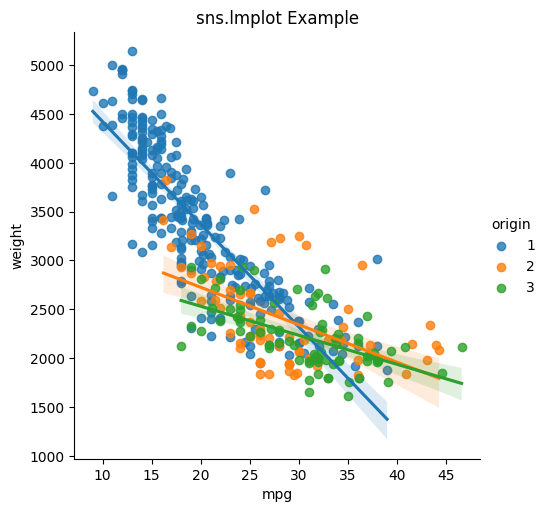

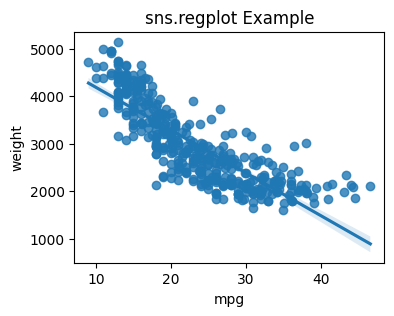

In [4]:
# 강사님 풀이
plt.figure(figsize=(4,3))
sns.lmplot(x='mpg', y='weight', data=auto, hue='origin')
plt.title('sns.lmplot Example')
plt.show()

plt.figure(figsize=(4,3))
sns.regplot(x='mpg', y='weight', data=auto)
plt.title('sns.regplot Example')
plt.show()

Task2_0618. pairplot을 생성해서 컬럼간의 관계를 시각화하세요. 단 종에 따라 다른 색상를 사용.

In [5]:
df_pg=sns.load_dataset('penguins')
df_pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


[Features]
- species: 펭귄의 종 (Adelie, Chinstrap, Gentoo)
- island: 데이터가 수집된 섬 (Biscoe, Dream, Torgersen)
- bill_length_mm: 부리 길이 (mm)
- bill_depth_mm: 부리 깊이 (mm)
- flipper_length_mm: 지느러미 길이 (mm)
- body_mass_g: 몸무게 (g)
- sex: 성별 (male, female)
- year: 데이터가 수집된 연도

[Species]
- Adelie: 아델리 펭귄
- Chinstrap: 턱끈펭귄
- Gentoo: 젠투펭귄

[수집된 섬]
- Biscoe
- Dream
- Torgersen

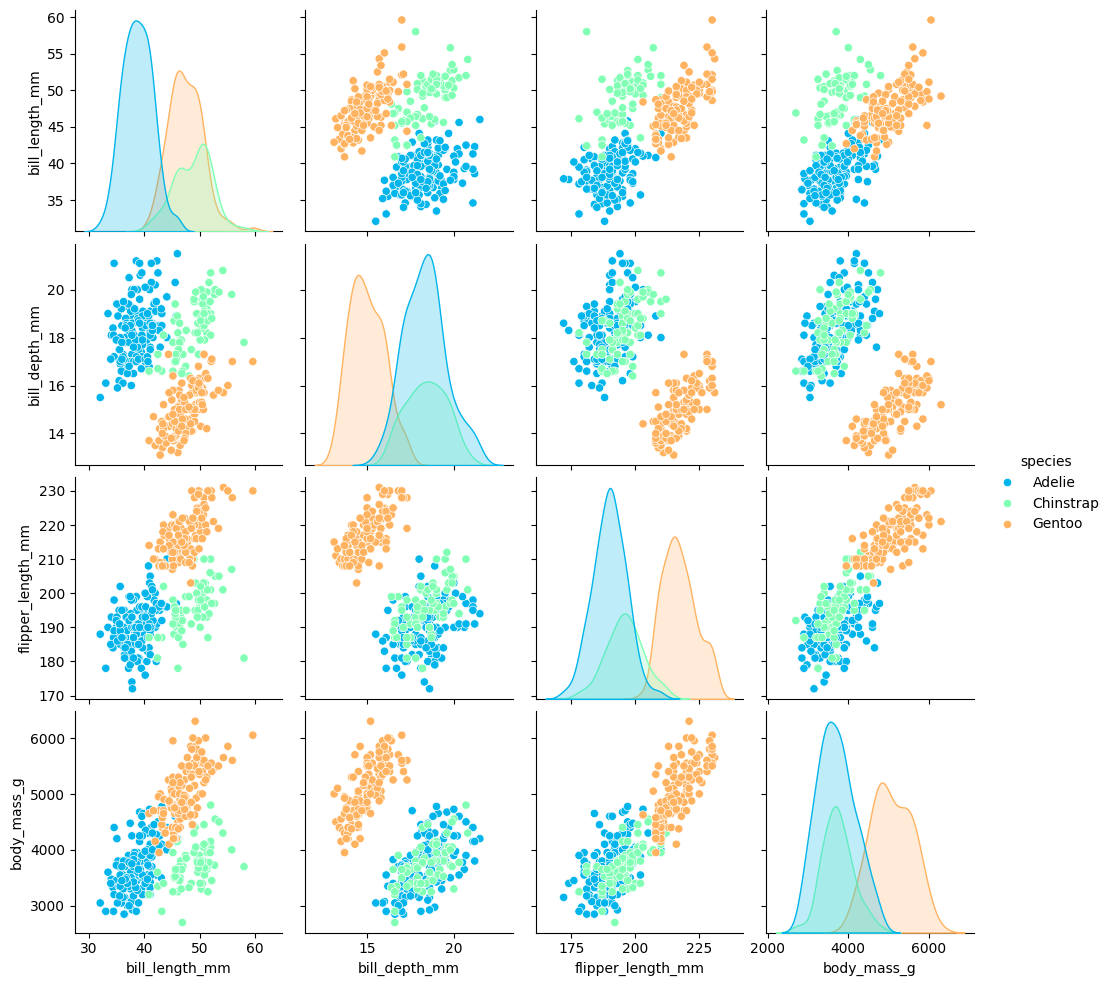

In [ ]:
sns.pairplot(df_pg[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']], hue='species', palette='rainbow', diag_kind='kde')
plt.show()

Task3_0618. 펭귄 데이터셋을 사용하여, 각 종별로 섬(island)별 개체 수를 나타내는 카운트 플롯을 생성하세요. x축은 'island', hue는 'species'로 설정하세요.

In [ ]:
df_pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


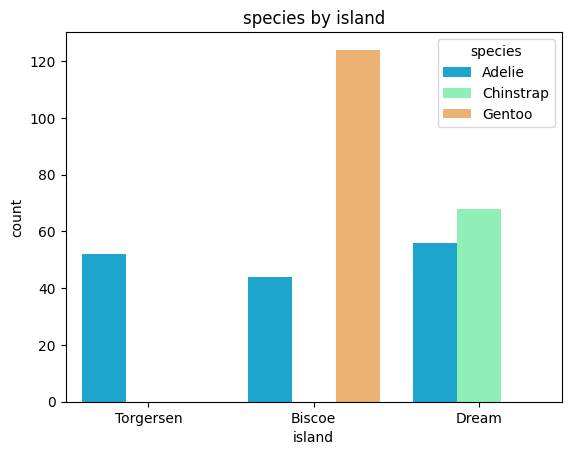

In [ ]:
sns.countplot(x='island', data=df_pg, hue='species', palette='rainbow') # 타임 별 테이블 사이즈 (인원수)
plt.title("species by island")
plt.show()

Task4_0618. sex와 class간의 생존율을 보여주는 히트맵을 작성하세요.

In [6]:
t_df=sns.load_dataset('titanic')
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
t_df['sex'].replace({'male':0, 'female':1}, inplace=True)
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0.5, 1.0, 's')

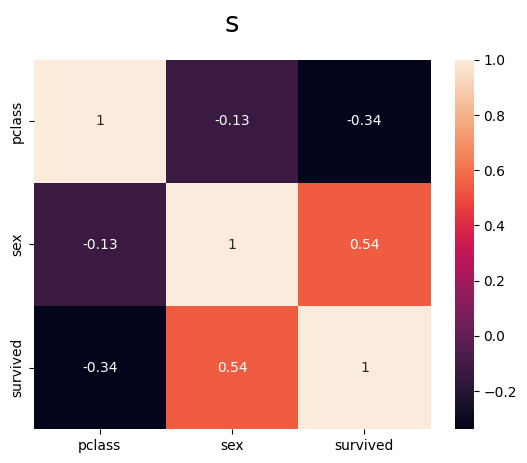

In [ ]:
sns.heatmap(t_df[['pclass','sex','survived']].corr(),annot=True)
plt.title('s', pad=20, fontsize=20)

<Axes: xlabel='class', ylabel='sex'>

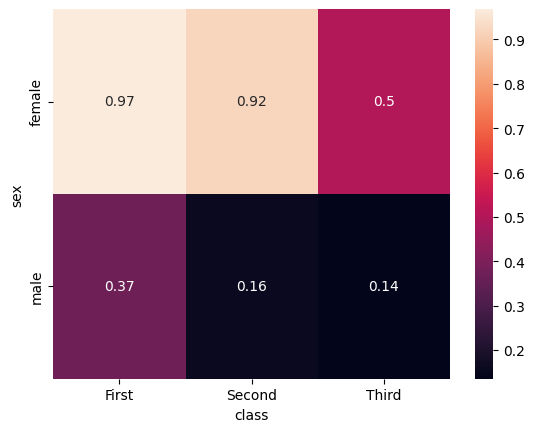

In [7]:
# 강사님 풀이:
pivot=pd.pivot_table(t_df, index='sex', columns='class',values='survived',
                     aggfunc=(lambda x:x.sum()/x.count()), fill_value=0)
sns.heatmap(pivot, annot=True)

Task5_0618. 타이타닉 데이터셋을 사용하여, 객실 등급(class)에 따른 탑승객의 나이를 나타내는 박스 플롯과 바이올린 플롯을 같은 그래프 내에서 나란히 생성하세요. 이를 통해 각 클래스별 나이 분포의 차이를 비교하세요.

<Axes: xlabel='pclass', ylabel='age'>

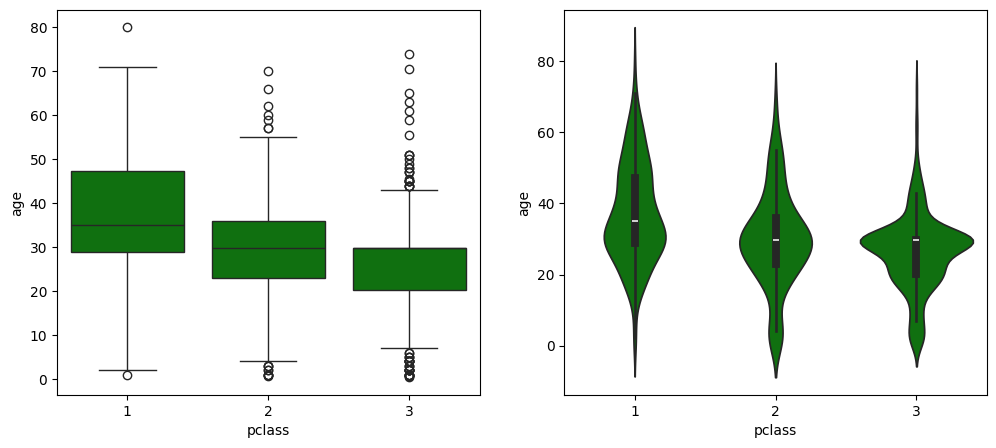

In [8]:
ttn=sns.load_dataset('titanic')
ttn['age'].replace(np.nan, ttn['age'].mean(), inplace=True)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=ttn['pclass'],y=ttn['age'], color='green')

plt. subplot(1,2,2)
sns.violinplot(x=ttn['pclass'], y=ttn['age'], color='green')